In [1]:
res1 = []
res2 = []

In [2]:
from tools import analytics
import torch
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

CFG_PATH = "neuralvision/configs/baseline.py"
SET_TYPE = "train"
BATCH_SIZE = 1 

cfg_file = analytics.get_config(CFG_PATH)
cfg, dataset, gpu_tfms = analytics.prepare_dataset(cfg_file, dataset_type=SET_TYPE, batch_size=BATCH_SIZE)
img_mean, img_std = analytics.calculate_mean_std(cfg)

MAX_SAMPLES = 20

for idx, sample in enumerate(iter(dataset)):
    image, boxes = analytics.preprocess_sample(
        sample,
        gpu_tfms,
        img_std,
        img_mean
    )
    stuff = dict(
        img_id = sample["image_id"][0],
        image = image,
        boxes = boxes,
        labels = sample["labels"][0].cpu().numpy().tolist(),
        lblmap = cfg.label_map
    )
    res1.append(stuff)

    if (idx+1) >= MAX_SAMPLES:
        break

Saving SSD outputs to: outputs/


In [3]:
from tools import analytics
import torch
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

CFG_PATH = "neuralvision/configs/retina_P4.py"
SET_TYPE = "train"
BATCH_SIZE = 1 

cfg_file = analytics.get_config(CFG_PATH)
cfg, dataset, gpu_tfms = analytics.prepare_dataset(cfg_file, dataset_type=SET_TYPE, batch_size=BATCH_SIZE)
img_mean, img_std = analytics.calculate_mean_std(cfg)

MAX_SAMPLES = 1

for idx, sample in enumerate(iter(dataset)):
    image, boxes = analytics.preprocess_sample(
        sample,
        gpu_tfms,
        img_std,
        img_mean
    )
    stuff = dict(
        img_id = sample["image_id"][0],
        image = image,
        boxes = boxes,
        labels = sample["labels"][0].cpu().numpy().tolist(),
        lblmap = cfg.label_map
    )
    res2.append(stuff)

    if (idx+1) >= MAX_SAMPLES:
        break

Saving SSD outputs to: outputs/


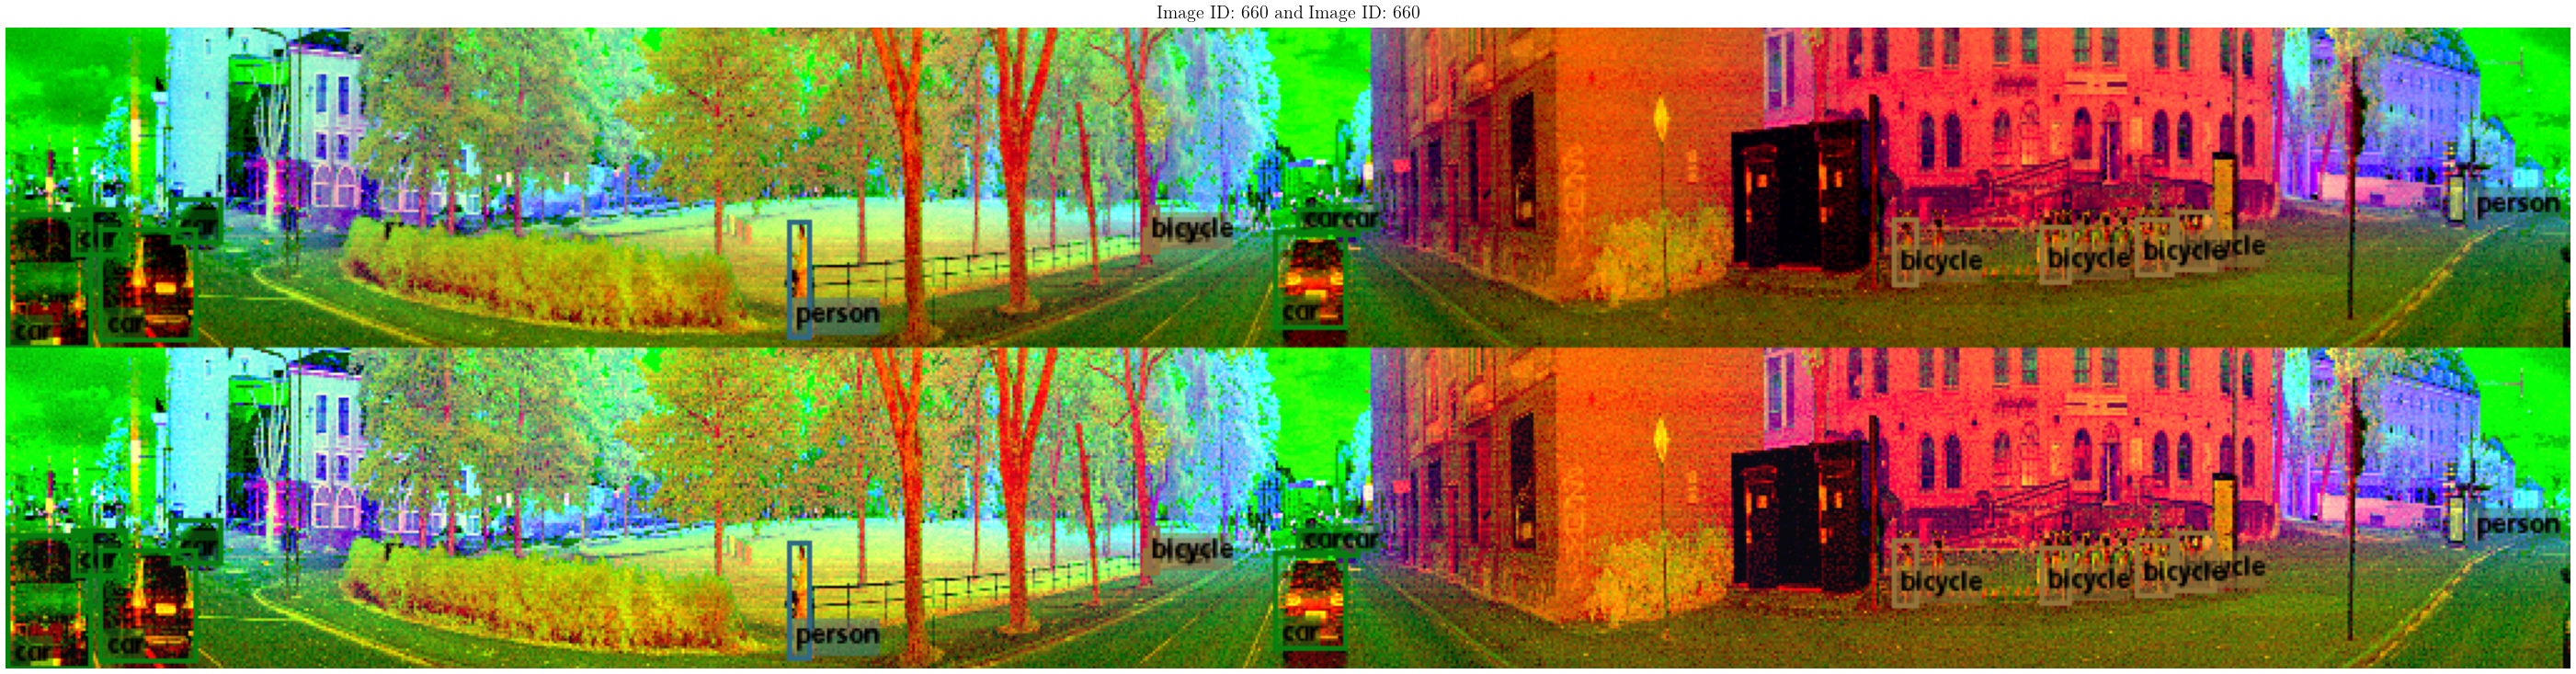

In [4]:
for img1, img2 in zip(res1, res2):
    analytics.dual_visualize_sample(img1, img2)